# INFO BASICA

# LIBRERIAS

In [9]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

In [10]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [11]:
# Leo los indicadores

indicadores = pd.read_excel('./data/Serie de indicadores Macro.xlsx', sheet_name='Hoja1', 
                           usecols=['Date', 'Citi Economic Surprise - USA'])

indicadores.columns = ['Date','Citi']
indicadores['Date'] = pd.to_datetime(indicadores['Date'], format="%Y-%m-%d")
indicadores = indicadores.set_index('Date')
indicadores = indicadores.loc['2015-04-30':,:]

In [12]:
# Veo una muestra

indicadores.head(10)

,Citi
Date,
2015-04-30,-62.2
2015-05-01,-62.3
2015-05-04,-56.1
2015-05-05,-65.3
2015-05-06,-67.3
2015-05-07,-64.7
2015-05-08,-64.3
2015-05-11,-61.0
2015-05-12,-59.5


In [13]:
# Leo los indicadores

US_Treasury = pd.read_excel('./data/Series de precios.xlsx', sheet_name='Datos de precios', 
                           usecols=['TY1 Comdty', 'US Treasury'])

US_Treasury.columns = ['Date','Precio']
US_Treasury = US_Treasury.iloc[1:,:]
US_Treasury['Date'] = pd.to_datetime(US_Treasury['Date'], format="%Y-%m-%d")
US_Treasury = US_Treasury.set_index('Date')
US_Treasury = US_Treasury.loc['2015-04-30':,:]
US_Treasury = US_Treasury.applymap(lambda x: x/1.1285216494845334)

In [14]:
US_Treasury.head()

,Precio
Date,
2015-04-30,113.755018
2015-05-01,113.228887
2015-05-04,113.215041
2015-05-05,112.910439
2015-05-06,112.619683


In [15]:
US_Treasury

,Precio
Date,
2015-04-30,113.755018
2015-05-01,113.228887
2015-05-04,113.215041
2015-05-05,112.910439
2015-05-06,112.619683
2015-05-07,112.882748
2015-05-08,113.270423
2015-05-11,112.439691
2015-05-12,112.578146


In [16]:
# Escojo el Standar & Poors 500 y lo uno al indicador

US_Treasury_final = US_Treasury.merge(indicadores, how='inner', on='Date')

In [17]:
# Veo una muestra

US_Treasury_final.head(20)

,Precio,Citi
Date,,
2015-04-30,113.755018,-62.2
2015-05-01,113.228887,-62.3
2015-05-04,113.215041,-56.1
2015-05-05,112.910439,-65.3
2015-05-06,112.619683,-67.3
2015-05-07,112.882748,-64.7
2015-05-08,113.270423,-64.3
2015-05-11,112.439691,-61.0
2015-05-12,112.578146,-59.5


In [18]:
# Calculo la rentabilidad, lo hago mediante la variación porcentual de un día a otro

US_Treasury_final['Rentabilidad'] = US_Treasury_final.Precio.pct_change() * 100
US_Treasury_final.Rentabilidad = US_Treasury_final.Rentabilidad.fillna(0)

In [19]:
# Visualizo una muestra

US_Treasury_final.head(20)

,Precio,Citi,Rentabilidad
Date,,,
2015-04-30,113.755018,-62.2,0.000000
2015-05-01,113.228887,-62.3,-0.462512
2015-05-04,113.215041,-56.1,-0.012228
2015-05-05,112.910439,-65.3,-0.269047
2015-05-06,112.619683,-67.3,-0.257511
2015-05-07,112.882748,-64.7,0.233587
2015-05-08,113.270423,-64.3,0.343432
2015-05-11,112.439691,-61.0,-0.733407
2015-05-12,112.578146,-59.5,0.123138


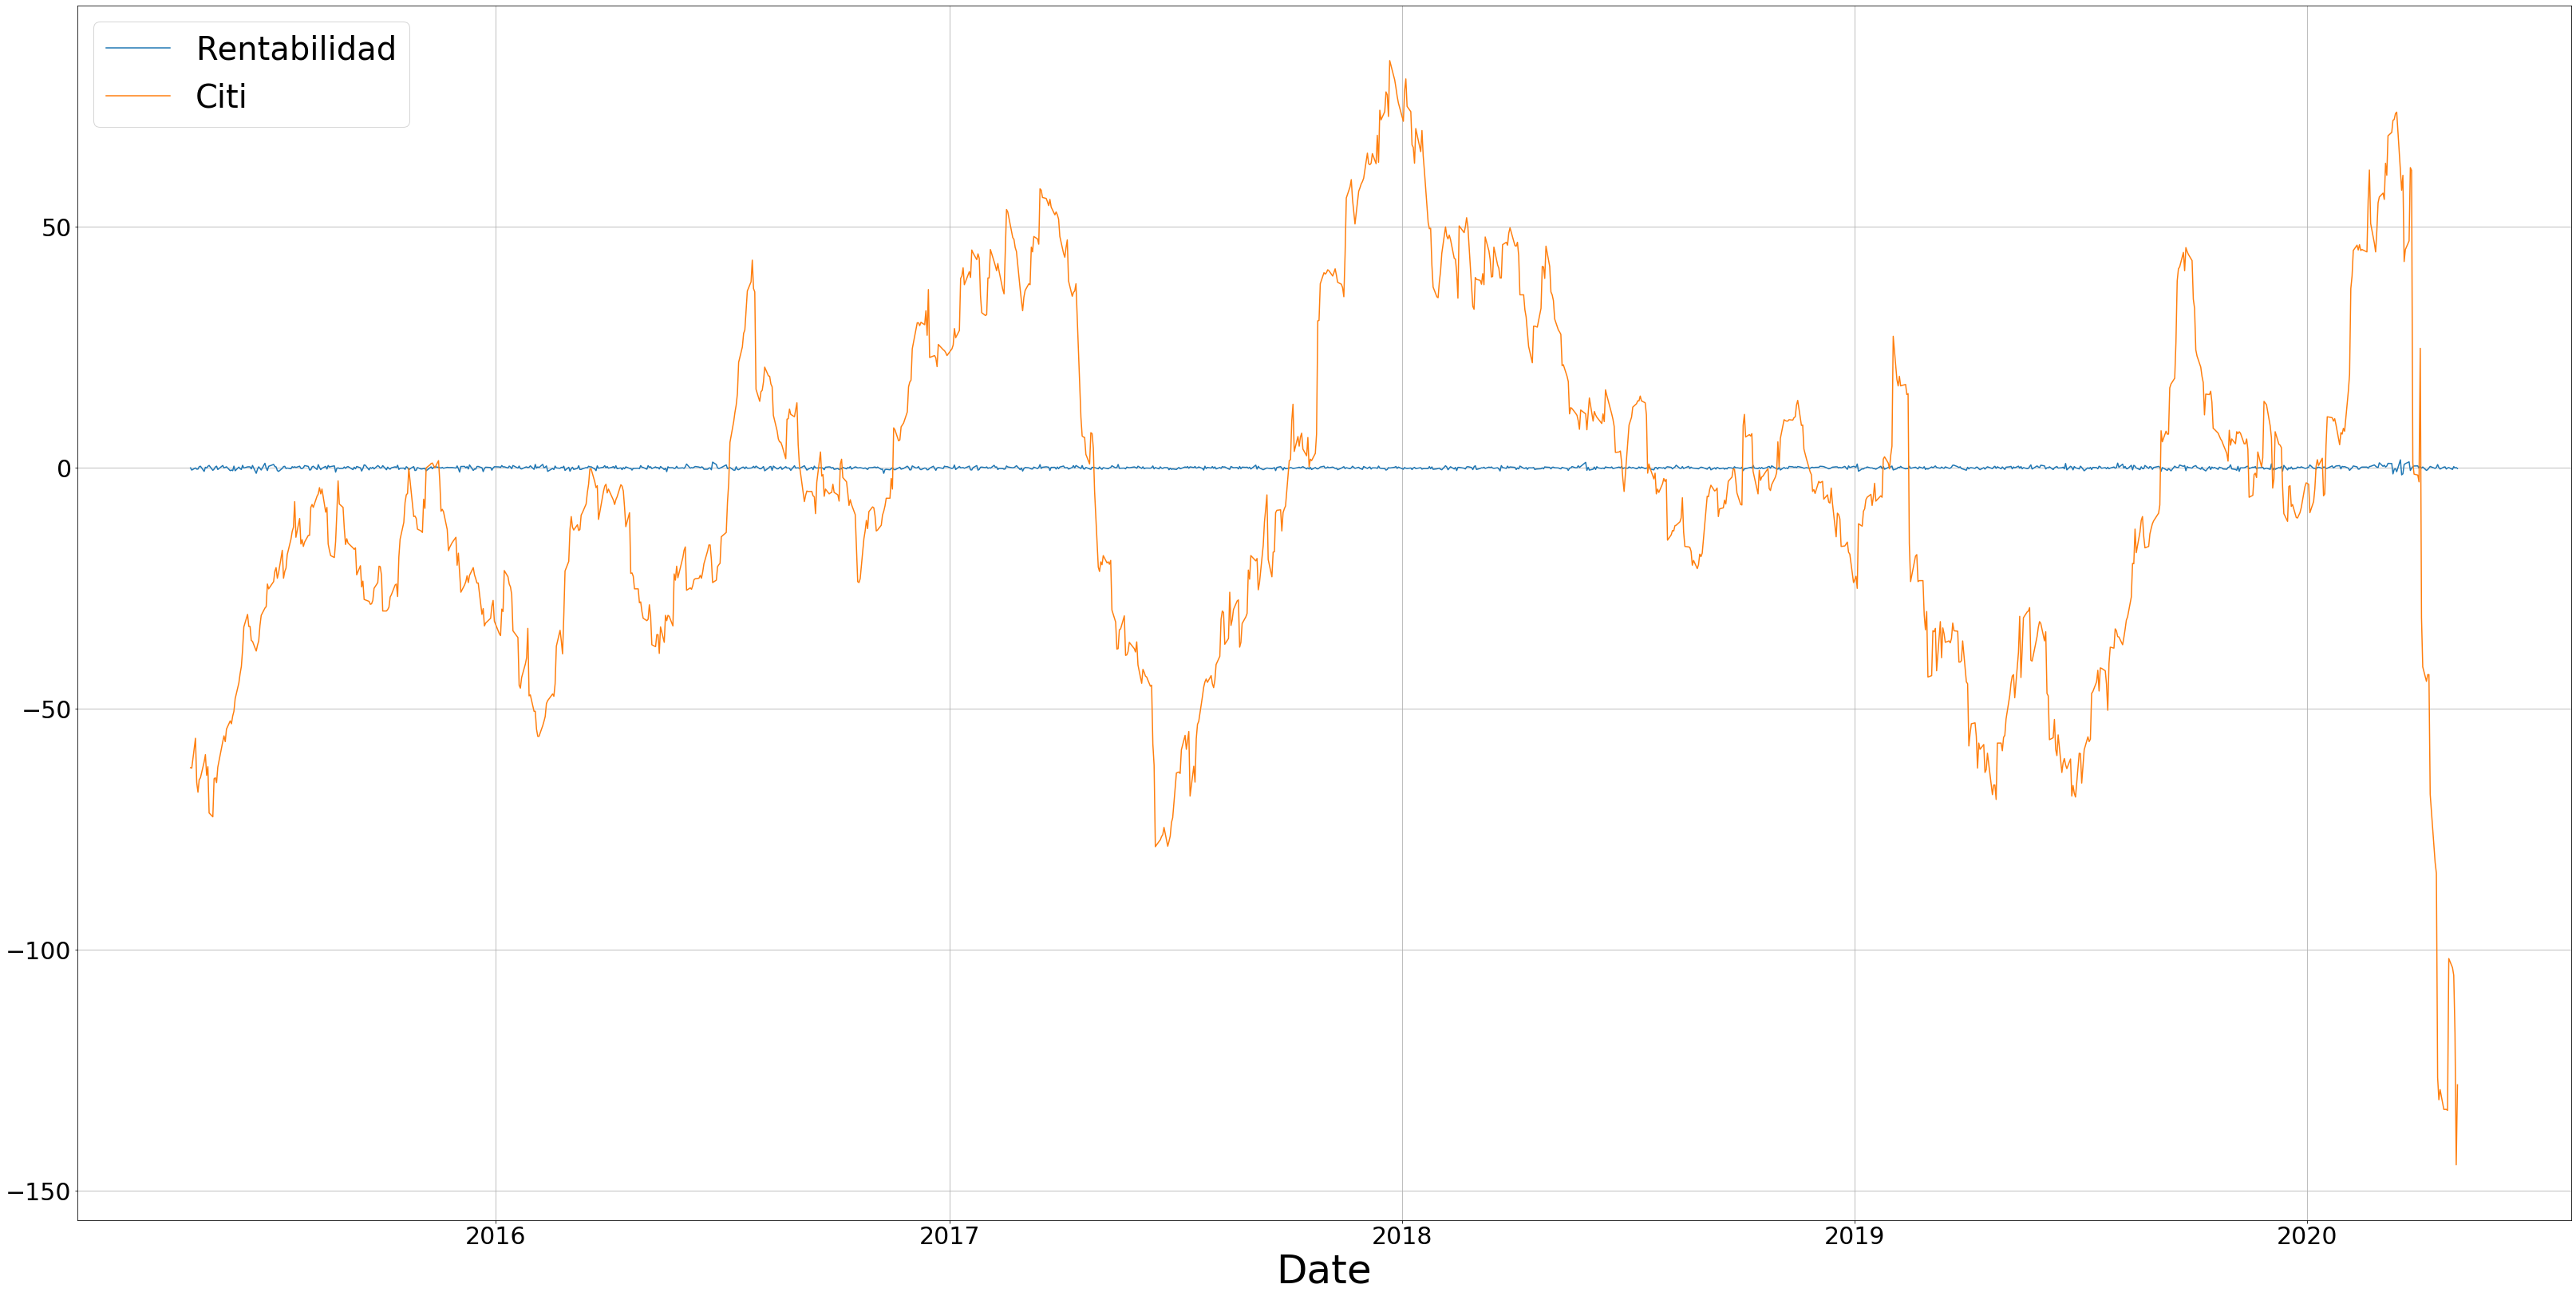

In [20]:
# Ploteo la rentabilidad y el Citi

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(US_Treasury_final["Rentabilidad"])
ax1 = plt.plot(US_Treasury_final["Citi"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Rentabilidad", "Citi"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [21]:
# Ahora calculo la correlación, debo elegir la ventana // Se hace entre el Precio y el Citi

def correlacion(ventana=100):
    
    US_Treasury_final['Correlacion'] = US_Treasury_final.Precio.rolling(window=ventana).corr(US_Treasury_final.Citi)
    
correlacion()

In [22]:
# Visualizo una muestra // Dará NaN donde no haya ventana, meto un cero 

US_Treasury_final = US_Treasury_final.fillna(0)
US_Treasury_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion
Date,,,,
2017-04-21,111.705876,2.8,0.086838,-0.256534
2016-03-09,114.738051,-12.8,-0.336741,-0.503417
2017-10-09,110.847453,6.5,0.049988,-0.045251
2017-09-11,112.758138,-16.1,-0.391389,-0.049316
2016-04-08,116.108761,-6.0,-0.166667,-0.165227
2018-05-30,106.873780,7.9,-0.515530,0.767824
2015-10-21,114.198075,-5.6,0.243072,0.323758
2020-02-18,116.261062,44.8,0.167005,0.685823
2016-02-11,116.994876,-48.9,0.403992,-0.559266


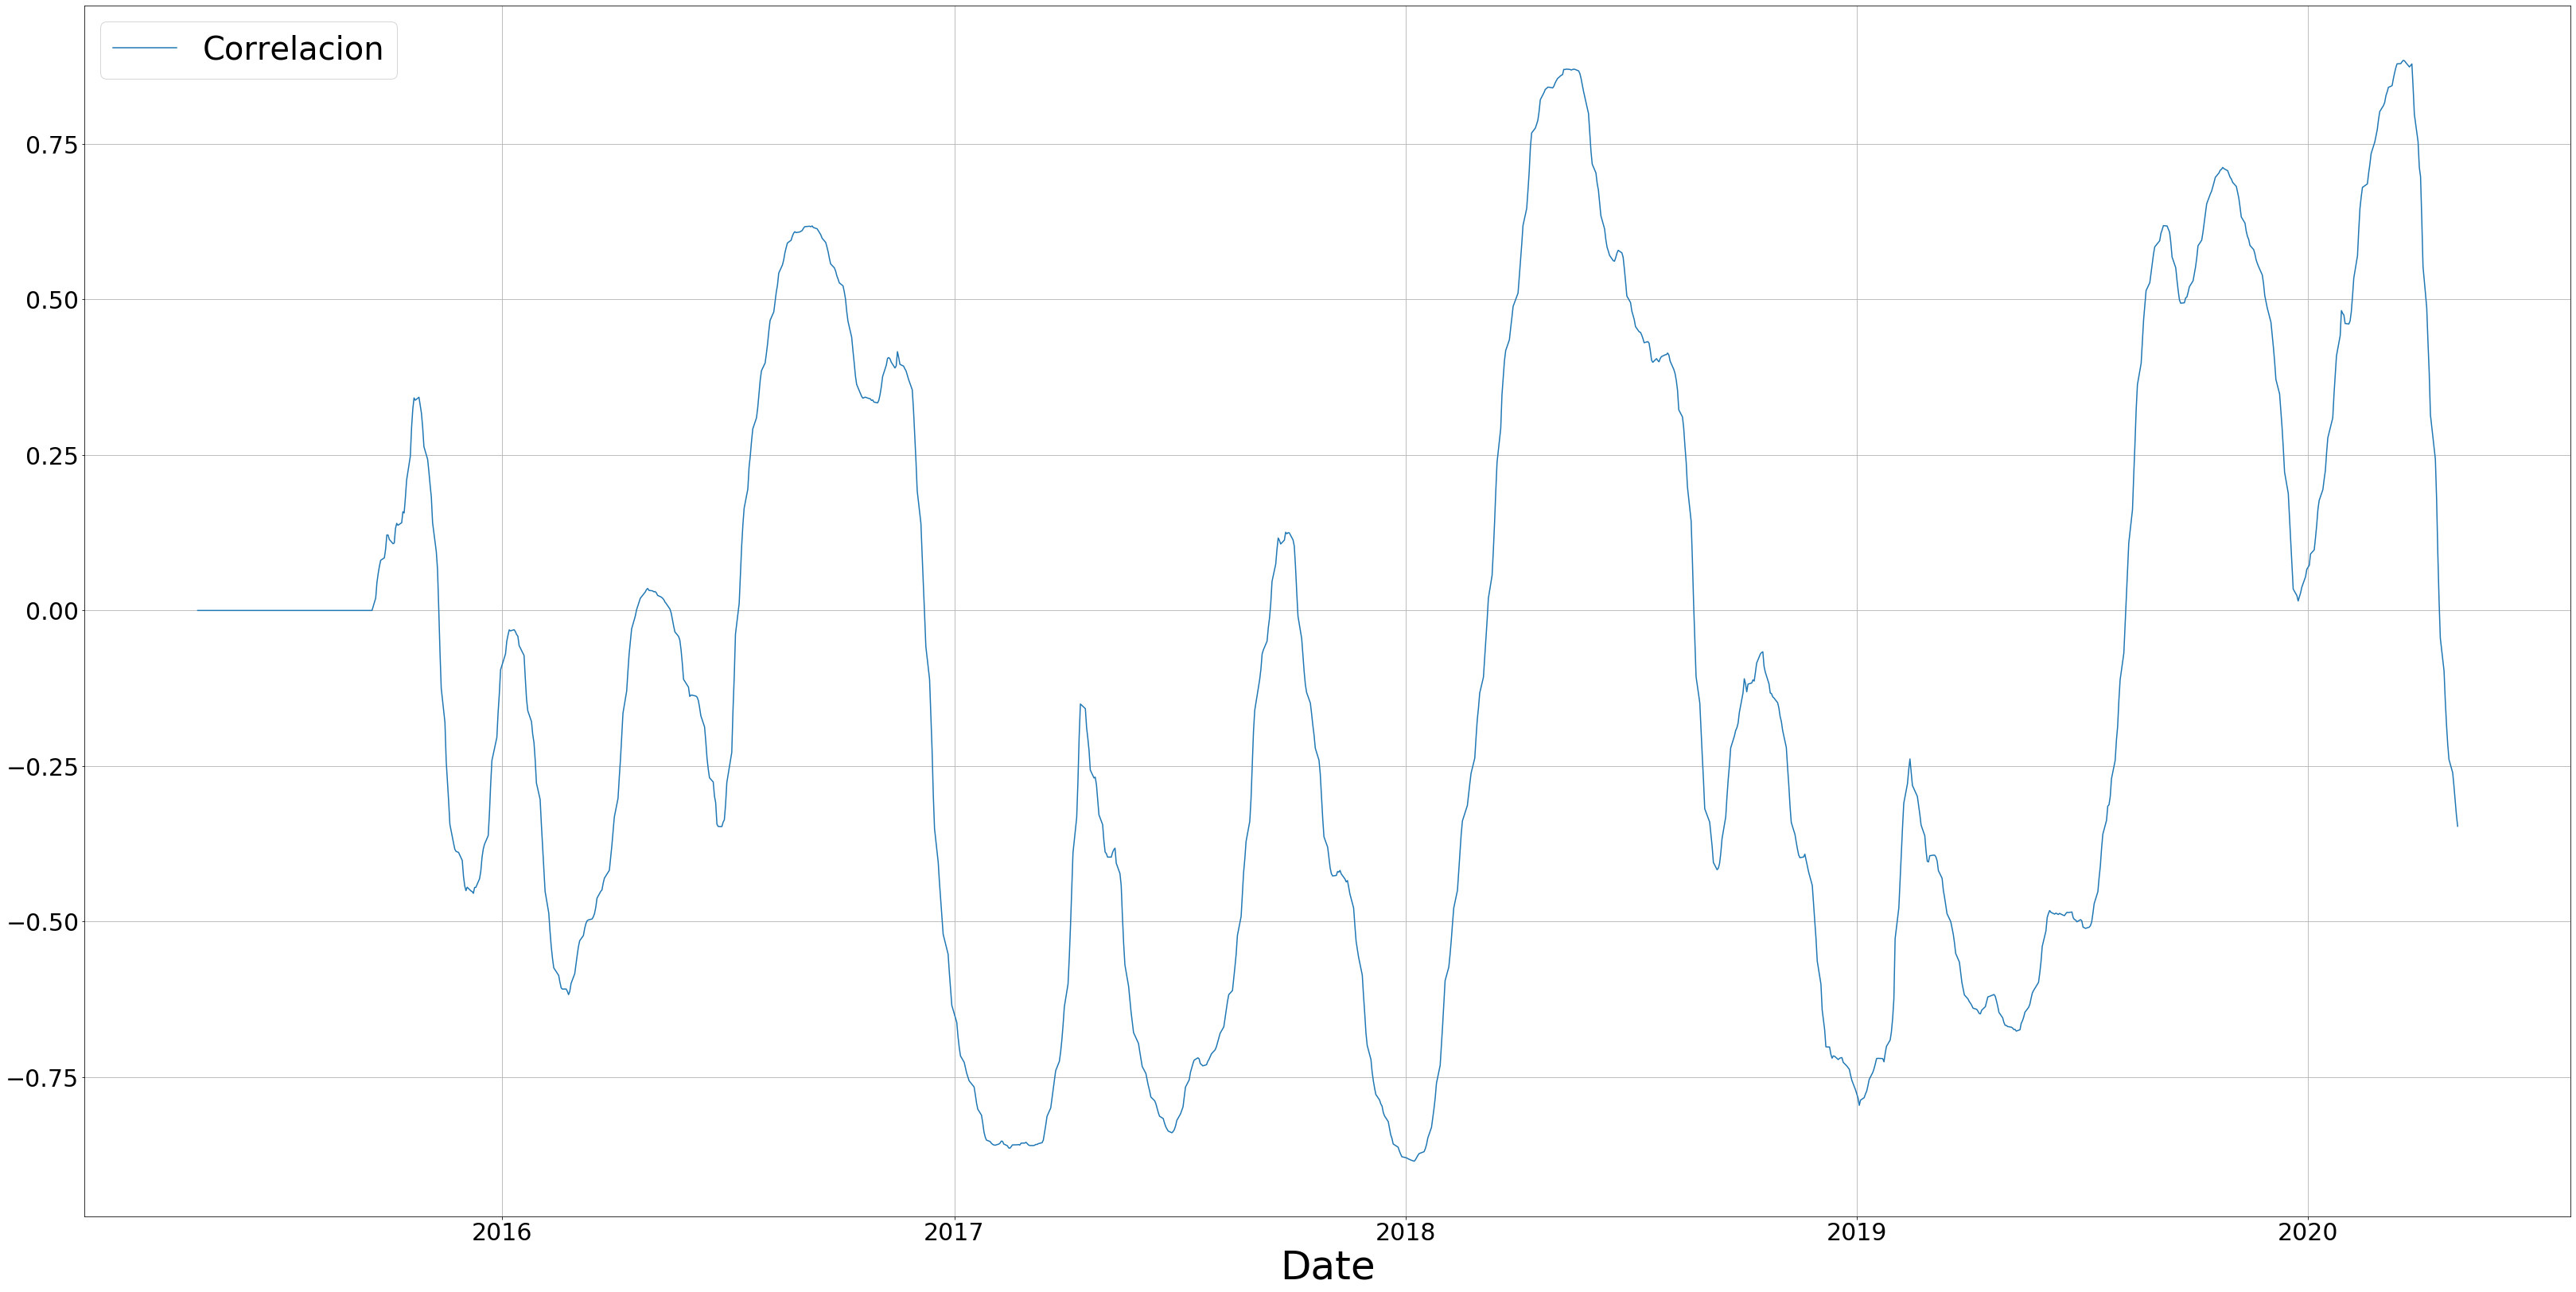

In [23]:
# Ploteo la correlacion

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(US_Treasury_final["Correlacion"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Correlacion"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [24]:
# Ahora determino la señal


US_Treasury_final['Señal'] = np.where((US_Treasury_final.Correlacion>0)&(US_Treasury_final.Citi>0),1, # Ambos mayores de cero
                          np.where((US_Treasury_final.Correlacion>0)&(US_Treasury_final.Citi<0),-1, # Uno mayor y otro menor de cero
                                  np.where((US_Treasury_final.Correlacion<0)&(US_Treasury_final.Citi>0),-1, # Uno menor y otro mayor de cero
                                          np.where((US_Treasury_final.Correlacion<0)&(US_Treasury_final.Citi<0),1,0)))) # Ambos menores de cero

In [25]:
# Visualizo una muestra

US_Treasury_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal
Date,,,,,
2017-01-26,109.850573,35.8,0.126199,-0.846533,-1
2015-11-24,112.453536,-17.2,0.073928,-0.383863,1
2019-12-05,114.585750,-2.3,-0.072446,0.399389,-1
2018-12-17,106.970699,-14.3,0.220521,-0.722013,1
2016-08-02,117.451779,15.8,-0.188257,0.412818,1
2015-08-07,112.938130,-8.2,0.344446,0.000000,0
2019-06-13,112.536609,-59.7,0.283775,-0.488744,1
2017-01-12,110.667460,41.5,0.062594,-0.749885,-1
2019-04-02,109.670581,-44.8,0.126406,-0.628803,1


In [26]:
# Calculo el Profit & Loss

US_Treasury_final['P&L'] = 100

for i in range(1, len(US_Treasury_final)):
    
    US_Treasury_final['P&L'].iloc[i] = US_Treasury_final['P&L'].iloc[i-1] * (1 + US_Treasury_final.Señal.iloc[i] *
                                                                 (US_Treasury_final.Rentabilidad.iloc[i]/100))

In [27]:
# Visualizo una muestra

US_Treasury_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal,P&L
Date,,,,,,
2015-09-24,113.533489,-27.5,0.122100,0.071081,-1,100.351535
2019-11-01,115.208800,6.0,-0.215853,0.688283,1,119.394880
2017-03-02,109.947492,35.4,-0.163440,-0.859233,-1,108.823039
2017-10-18,110.888989,0.2,-0.236672,-0.184351,-1,109.448836
2016-09-12,116.482590,-4.9,0.107092,0.613621,-1,105.167308
2019-11-14,114.613441,3.8,0.351558,0.596554,1,118.777889
2017-09-27,111.152055,-9.3,-0.446429,0.123383,-1,109.465434
2020-01-14,114.433449,-5.8,0.169676,0.210343,-1,119.369792
2019-04-30,109.587508,-58.7,0.189873,-0.662481,1,116.840975


In [28]:
# Genero el Buy&Hold para hacer la comparación

US_Treasury_final['Buy&Hold'] = 100

for i in range(1, len(US_Treasury_final)):
    
    US_Treasury_final['Buy&Hold'].iloc[i] = US_Treasury_final['Buy&Hold'].iloc[i-1]*(1 + (US_Treasury_final.Rentabilidad.iloc[i]/100))

In [29]:
# Visualizo una muestra

US_Treasury_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal,P&L,Buy&Hold
Date,,,,,,,
2018-11-20,105.752291,8.9,0.039293,-0.391824,-1,112.788005,92.964946
2020-01-16,114.447295,4.6,-0.144963,0.253232,1,119.009266,100.608569
2019-07-10,112.924285,-56.3,0.110470,-0.500806,1,120.398610,99.269718
2019-09-26,115.444174,44.9,0.252495,0.511436,1,119.638806,101.484907
2017-04-12,111.179746,36.7,-0.012452,-0.202864,-1,107.598986,97.736125
2015-06-23,111.165900,-36.8,-0.298026,0.000000,0,100.000000,97.723953
2019-05-14,110.169021,-30.8,-0.075348,-0.663721,1,117.460978,96.847614
2018-05-02,105.904592,35.9,0.117801,0.848042,1,112.132463,93.098832
2015-08-14,112.855057,-4.4,-0.098051,0.000000,0,100.000000,99.208861


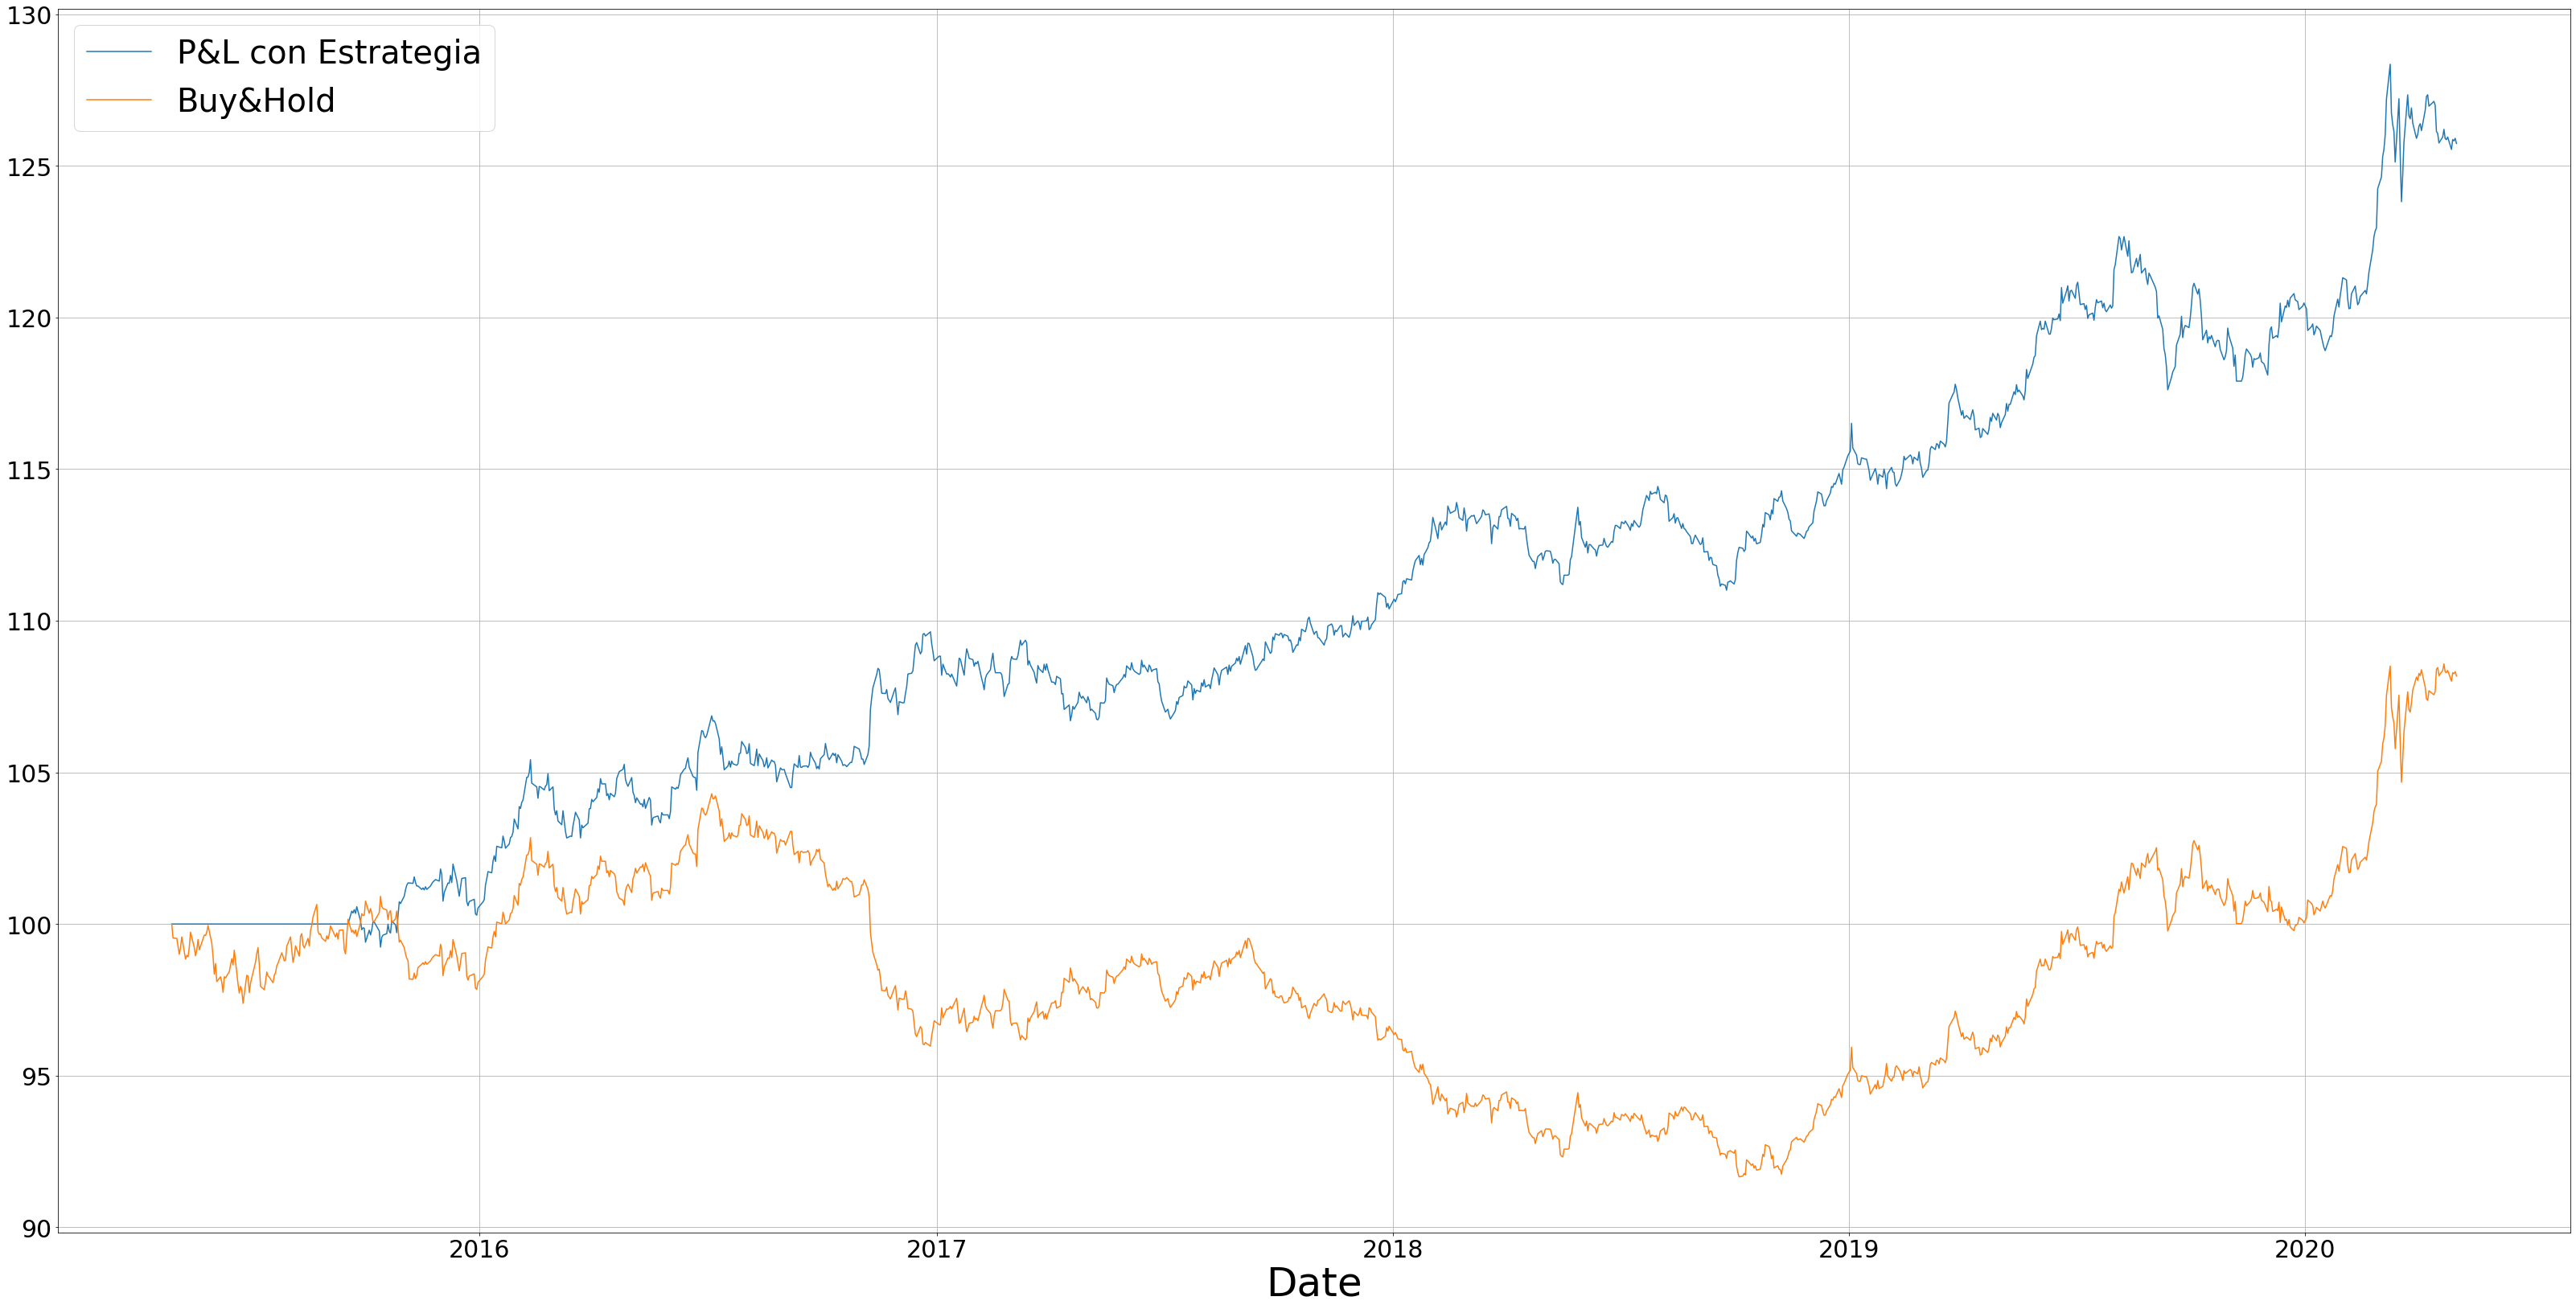

In [30]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(US_Treasury_final["P&L"])
ax1 = plt.plot(US_Treasury_final["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["P&L con Estrategia", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [31]:
US_Treasury_citi = pd.DataFrame(US_Treasury_final.loc[:, 'P&L'])
US_Treasury_citi.columns = ['Indice_US_Treasury']
US_Treasury_citi

,Indice_US_Treasury
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [32]:
US_Treasury_citi.to_csv('./data_resultante/US_Treasury_citi.csv')